In [1]:
import course;course.header()

# Advanced Python Course 
## Mobi Heidelberg WS 2021/22
### by Christian Fufezan 

christian@fufezan.net

https://fufezan.net

<img src="./images/cc.png" alt="drawing" width="200" style="float: left;"/>


# Excersise No. 1

## Count Amino acid propensity in human proteome

Got to Uniprot and download the latests [here](https://www.uniprot.org/uniprot/?query=*&fil=organism%3A%22Homo+sapiens+%28Human%29+%5B9606%5D%22+AND+reviewed%3Ayes#)

The file containes protein sequences in FASTA format, i.e.
```txt
> (( Identifier line ))
(( Amino acid Sequence, can stretch over multiple lines ))
> (( next identifier line ))
```

Write a function that takes two arguments, 
 * a path to the a fasta database and  
 * an output file name.

The function should do the following:
 * parses the input fasta file 
 * counts the amino acid frequency and 
 * write a csv output file that looks like 

```
aa, count
A, 123123123
C, 3213
D, ...
```

In [17]:
import csv
from collections import Counter

def aa_propensity(input_file_path, output_file_path):
    
    aminoacid_counter = Counter()

    with open(input_file_path, 'r') as uniprot_file:
        for line in uniprot_file:
            if line[0] != '>':
                line = line.strip()
                aminoacid_counter += Counter(line)

    with open(output_file_path, 'w', newline = '') as output_file:
        output_writer = csv.writer(output_file)
        output_writer.writerow(['aa', 'counter'])
        for key, value in sorted(aminoacid_counter.items()):
            output_writer.writerow([key, str(value)])
            
    return aminoacid_counter


In [18]:
aa_count = aa_propensity('uniprot_human.fasta', 'output_human.csv')

## Plot a histogram for human
Use the dictionary created in a) to plot a histogram using your favorit lib

Create a standalone script that will plot the histogram
```bash
$ ./plot_aa_histogram.py "uniprot-filtered-proteome%3AUP000005640+AND+reviewed%3Ayes+AND+organism%3A%22Hom--.fasta"
```

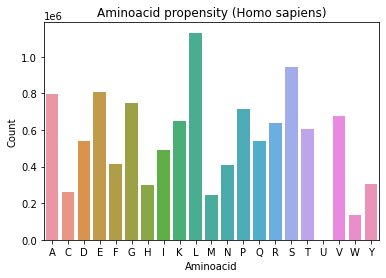

In [22]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

def plot_aa_distribution_to_pdf(aap_output, output_file, title):

    col_names = ['Count']
    aap_output_df = pd.DataFrame.from_dict(aap_output, orient='index', columns=col_names)

    # Aminoacids as row names --> aminoacids as a column
    aap_output_df = aap_output_df.rename_axis('Aminoacid').reset_index()

    aap_output_df = aap_output_df.sort_values(by='Aminoacid')

    ax = sn.barplot(x = 'Aminoacid', y = 'Count', data = aap_output_df)
    ax.set_title(title)
    plt.savefig(output_file)

plot_aa_distribution_to_pdf(aa_count, 'aa_propensity_human.pdf', 'Aminoacid propensity (Homo sapiens)')


## Rinse and repeat 
Repeat counting and plotting for at leat one organism of the following kingdoms of life:
* Bacteria
* Archea 
* Plantae
* Animalia

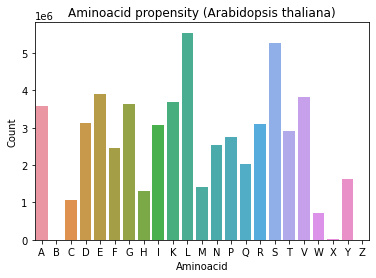

In [23]:
aa_count_plant = aa_propensity('uniprot_arabidopsis.fasta', 'output_arabidopsis.csv')
plot_aa_distribution_to_pdf(aa_count_plant, 
'aa_propensity_arabidopsis.pdf', 
'Aminoacid propensity (Arabidopsis thaliana)')

Are there difference? 

# Find special proteins

Find the most extreme proteins
* lowest / highest pI
* longest / shortest proteins
* highest density [mass / amino acid counts]
* most hydrophobic, hydrophic 
